<a href="https://colab.research.google.com/github/rohinishimpatwar/DeepLearning/blob/master/Assignment4-DeepLearning/MaskRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gluoncv
!pip install mrcnn
!pip install mxnet

     |████████████████████████████████| 512kB 9.0MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54932 sha256=4a3b5f796f9c377a049e1b5a16e28e829e2e1e2d0931b43eef7d9c00bc2bfd04
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn
     |████████████████████████████████| 25.4MB 91kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1



**Predict with pre-trained Mask RCNN models**

Mask RCNN networks are extensions to Faster RCNN networks. :py:class:gluoncv.model_zoo.MaskRCNN is inherited from :py:class:gluoncv.model_zoo.FasterRCNN. It is highly recommended to read :doc:../examples_detection/demo_faster_rcnn first.

In [0]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

# **Load a pretrained model¶**
Mask RCNN model trained on COCO dataset with ResNet-50 backbone. By specifying pretrained=True, it will automatically download the model from the model zoo if necessary. For more pretrained models, please refer to :doc:../../model_zoo/index.

The returned model is a HybridBlock :py:class:gluoncv.model_zoo.MaskRCNN with a default context of cpu(0).

In [0]:

net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

Model file is not found. Downloading.


100%|██████████| 131497/131497 [00:05<00:00, 22862.69KB/s]


# **Pre-process an image**
Download an image, and pre-process with preset data transforms. The default behavior is to resize the short edge of the image to 600px.

In [0]:

im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|██████████| 244/244 [00:00<00:00, 15801.17KB/s]



# **Inference and display**
The Mask RCNN model returns predicted class IDs, confidence scores, bounding boxes coordinates and segmentation masks. Their shape are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1) (batch_size, num_bboxes, 4), and (batch_size, num_bboxes, mask_size, mask_size) respectively. For the model used in this tutorial, mask_size is 14.

Object Detection results

We can use :py:func:gluoncv.utils.viz.plot_bbox to visualize the results. We slice the results for the first image and feed them into plot_bbox

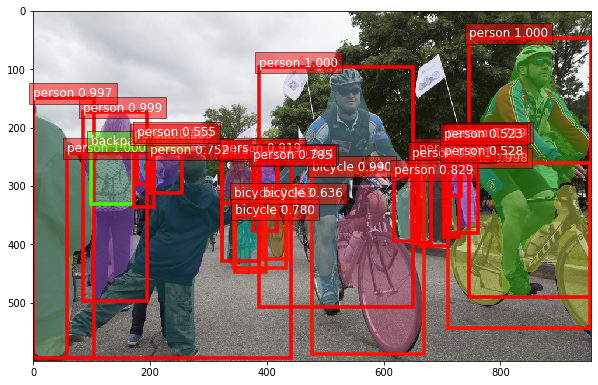

In [0]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()